In [1]:
import h5py
import tables as tbl
import numpy as np

# HDF5 usage

In this notebook, different options to analyze HDF5 files are explored using existing packages available in Python. The aim is to get an overview of the possibility to extract the data and metadata of the hdf5 files and some more information on how we can query this data.

## Introduction

Regarding the `hdf5`, the default directory tree will be `radar/yyyy/mm/dd/hh/radar_yyyymmddhhmm.h5`, where each file contains one profile for one radar at one time instant only. Baltrad provides data at 15 min interval, so 4 files per directory.

The data specification is as follows:
https://github.com/adokter/vol2bird/wiki/ODIM-bird-profile-format-specification

The available data are:
- test file in this repo `profile_example.h5`
- https://github.com/adokter/ODIM-hdf5-test

In each fole, the `quantity` metadata is providing the information about the data quantity description. Let us use the [dataformat](https://github.com/adokter/vol2bird/wiki/ODIM-bird-profile-format-specification) description to provide full name description:

In [2]:
var_names = {"HGHT": "Height [km?]",
             "width": "Layer width [m]",
             "ff" : "Bird flight ground speed",
             "dd" : "Bird flight direction",
             "w" : "vertical bird speed [m/s]",
             "gap" : "indicator of azimuthal gap without data detected",
             "dbz" : "Bird reflectivity factor [dBZ]",
             "eta" : "Bird reflectivity [cm2/km3]",
             "dens" : "Bird density",
             "n" : "Number of samples used for bird velocity profile",
             "n_dbz" : "Number of samples used for dBZ profile",
             "sd_vvp" : "Standard deviation of VVP fit",
             "DBZH" : "Reflectivity profile",
             "n_all" : "Number of samples used for total velocity profile",
             "n_dbz_all" : "Number of samples used for total dBZ profile"}

## repo-based download set of files, ODIM-hdf5-test

https://github.com/adokter/ODIM-hdf5-test

In [13]:
import os
import datetime
import sys

sys.path.append("../")
from download_service import *

In [16]:
local_folder = "./h5_data"

The following code is provided by Bart Aelterman to get data from a Github-repository:

In [21]:
with h5py.File("./h5_data/frtou_vp_20151010T0000Z.h5", 'r') as hf:
    print('List of arrays in this file: \n', list(hf.items()))

List of arrays in this file: 
 [('dataset1', <HDF5 group "/dataset1" (15 members)>), ('how', <HDF5 group "/how" (0 members)>), ('what', <HDF5 group "/what" (0 members)>), ('where', <HDF5 group "/where" (0 members)>)]


## h5py package

### Single file

Reading in a single hdf5 file is directly supported by the `h5py` package:

In [22]:
hf = h5py.File('profile_example.h5', 'r')
print('List of arrays in this file: \n', list(hf.items()))

List of arrays in this file: 
 [('dataset1', <HDF5 group "/dataset1" (15 members)>), ('how', <HDF5 group "/how" (0 members)>), ('what', <HDF5 group "/what" (0 members)>), ('where', <HDF5 group "/where" (0 members)>)]


In this case, `dataset1` has 15 members, whereas `what`, `how` and `where` only consist of attributes. 

Start with the attributes:

### Attributes only groups
The groups are not holding data arrays, but provide the metadata:

#### what

In [23]:
for at in hf.get("what").attrs.items():
    print(at)

('object', b'VP')
('version', b'H5rad 2.2')
('date', b'20151011')
('time', b'235512')
('source', b'RAD:NL50,NOD:nldbl,PLC:De Bilt')


**Time** and **date** information is provided in these attributes

#### how

In [24]:
for at in hf.get("how").attrs.items():
    print(at)

('wavelength', 5.3000001907348633)
('task', b'vol2bird')
('task_args', b'azimMax=360.000000,azimMin=0.000000,layerThickness=200.000000,nLayers=20,rangeMax=25000.000000,rangeMin=5000.000000,elevMax=90.000000,elevMin=0.000000,radarWavelength=5.300000,useStaticClutterData=0,fitVrad=1,exportBirdProfileAsJSONVar=0,minNyquist=20.000000,birdRadarCrossSection=11.000000,stdDevMinBird=2.000000,dBZType=DBZH,requireVrad=0,nGatesCellMin=4,cellClutterFractionMax=0.500000,cellDbzMin=15.000000,chisqMin=0.000010,clutterValueMin=-10.000000,dbzMax=20.000000,dbzThresMin=0.000000,fringeDist=5000.000000,nBinsGap=8,nPointsIncludedMin=25,nNeighborsMin=5,nObsGapMin=5,nAzimNeighborhood=3,nRangNeighborhood=3,nCountMin=4,refracIndex=0.964000,cellStdDevMax=5.000000,absVDifMax=10.000000,vradMin=1.000000')
('maxrange', 25.0)
('minazim', 0.0)
('task_version', b'0.2.2')
('beamwidth', 1.0)
('sd_vvp_thresh', 2.0)
('comment', b'')
('minrange', 5.0)
('rcs_bird', 11.0)
('maxazim', 360.0)
('clutterMap', b'')


#### where

In [25]:
for at in hf.get("where").attrs.items():
    print(at)

('levels', 20)
('interval', 200.0)
('minheight', 0.0)
('maxheight', 4000.0)
('height', 44.099998474121094)
('lat', 52.101680755615234)
('lon', 5.178339958190918)


#### dataset 1 group

Exploring the different members of the `dataset` group:

In [26]:
for data in hf.get("/dataset1"):
    #print(list(hf.get("/dataset1/{}".format(data)).keys()))
    print(data, list(hf.get("/dataset1/{}/what".format(data)).attrs.items()))

data1 [('offset', 0.0), ('nodata', nan), ('quantity', b'ff'), ('nodetect', -9999.0), ('gain', 1.0)]
data10 [('offset', 0.0), ('nodata', nan), ('quantity', b'dbz'), ('nodetect', -9999.0), ('gain', 1.0)]
data11 [('offset', 0.0), ('nodata', nan), ('quantity', b'dens'), ('nodetect', -9999.0), ('gain', 1.0)]
data12 [('offset', 0.0), ('nodata', nan), ('quantity', b'width'), ('nodetect', -9999.0), ('gain', 1.0)]
data13 [('offset', 0.0), ('nodata', nan), ('quantity', b'gap'), ('nodetect', -9999.0), ('gain', 1.0)]
data14 [('offset', 0.0), ('nodata', nan), ('quantity', b'w'), ('nodetect', -9999.0), ('gain', 1.0)]
data15 [('offset', 0.0), ('nodata', nan), ('quantity', b'n_dbz'), ('nodetect', -9999.0), ('gain', 1.0)]
data2 [('offset', 0.0), ('nodata', nan), ('quantity', b'dd'), ('nodetect', -9999.0), ('gain', 1.0)]
data3 [('offset', 0.0), ('nodata', nan), ('quantity', b'n'), ('nodetect', -9999.0), ('gain', 1.0)]
data4 [('offset', 0.0), ('nodata', nan), ('quantity', b'DBZH'), ('nodetect', -9999.0),

In [27]:
mydata = {}
for data in hf.get("/dataset1"):
    for var in hf.get("/dataset1/{}/what".format(data)).attrs.items():
        if 'quantity' in var:
            shortname = var[1]
    
    #print(list(hf.get("/dataset1/{}".format(data)).keys()))
    mydata[var_names[shortname.decode("utf-8")]] = np.array(hf.get("/dataset1/{}/data".format(data))).flatten()

In [28]:
import pandas as pd

In [29]:
%matplotlib inline

In [30]:
mydata = pd.DataFrame(mydata)

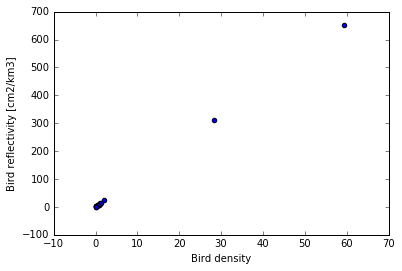

In [31]:
mydata[["Bird density", "Bird reflectivity [cm2/km3]"]].plot(kind="scatter",
                                                             x="Bird density",
                                                             y="Bird reflectivity [cm2/km3]")

In [32]:
hf.close()

### pyTables Package

The pytables package provides a more elaborate environment to work with HDF5 files. 

In [33]:
h5file = tbl.open_file("profile_example.h5", "r")

Get the date:

In [34]:
h5file.get_node_attr("/what", "date")

b'20151011'

Get the time:

In [35]:
h5file.get_node_attr("/what", "time")

b'235512'

In [36]:
var_names[h5file.get_node_attr("/dataset1/data1/what", "quantity").decode("utf-8")]

'Bird flight ground speed'

In [37]:
tbl = h5file.get_node('/dataset1/data1', 'data')

In [38]:
np.array(tbl)

array([[ 14.9899044 ],
       [ 14.00119877],
       [  8.15086651],
       [  5.17761421],
       [  6.57793045],
       [  6.11491489],
       [  5.76526499],
       [  6.36693144],
       [  7.14864826],
       [  9.8743    ],
       [  7.24725246],
       [  8.3162365 ],
       [  6.2156744 ],
       [  5.6734271 ],
       [  3.34443402],
       [  1.50865161],
       [         nan],
       [         nan],
       [  1.32985842],
       [         nan]])

In [39]:
h5file.close()

## Extracting data functionalities

Using the pytables package, we can create some functions to quickly gather the metadata and data from a provided hdf5 file:

#### Extract settings

In [40]:
from dateutil.parser import parse

In [41]:
def _get_date(metadata):
    """metadata date and time fieds to a python native datetime object"""
    return parse("".join([metadata["date"], metadata["time"]]))

In [42]:
import tables as tbl

def get_metadata_from_h5(file):
    """extract the attrubutes from the first level from a hdf5 file
    
    Parameters
    ----------
    file : str
        relative path to the hdf5 file
        
    Returns
    -------
    info : dict
        dictionary with the metadata
    """

    info = {}
    with tbl.open_file(file, "r") as h5file:
        for group in h5file.iter_nodes("/"):
            for meta in group._v_attrs._f_list("all"):
                temp = group._f_getattr(meta)
                if isinstance(temp, np.bytes_):
                    info[meta] = temp.decode("utf-8")
                else:
                    info[meta] = temp
        return info

In [43]:
temp = []
for file in os.listdir(local_folder):
    metadata = get_metadata_from_h5(os.path.join(local_folder, file))
    temp.append(_get_date(metadata))

In [44]:
set(temp)

{datetime.datetime(2015, 10, 9, 0, 0, 3),
 datetime.datetime(2015, 10, 9, 0, 0, 9),
 datetime.datetime(2015, 10, 9, 0, 0, 16),
 datetime.datetime(2015, 10, 10, 0, 0),
 datetime.datetime(2015, 10, 10, 0, 10),
 datetime.datetime(2015, 10, 10, 0, 10, 10),
 datetime.datetime(2015, 10, 10, 0, 10, 11),
 datetime.datetime(2015, 10, 10, 0, 14, 1)}

#### Extract data

In [45]:
import tables as tbl

def get_data_from_h5(file):
    """extract the data from an hdf5 file
    
    Parameters
    ----------
    file : str
        relative path to the hdf5 file
        
    Returns
    -------
    data : dict
        dictionary with the data
    """

    data = {}
    with tbl.open_file(file, "r") as h5file:
        for group in h5file.iter_nodes("/dataset1"):
            # get quantity
            quantity = group.what._f_getattr("quantity").decode("utf-8")
            #get data
            data[quantity] = np.array(group.data).flatten()
    return data

In [46]:
data = get_data_from_h5("profile_example.h5")

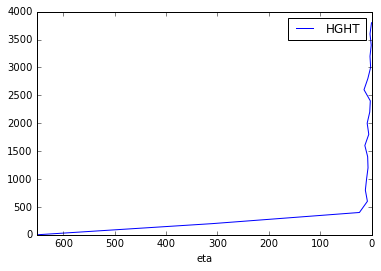

In [47]:
df_data = pd.DataFrame(data)
df_data.plot(x="eta", y="HGHT", kind='line')

In [48]:
df_data.head()

,DBZH,HGHT,dbz,dd,dens,eta,ff,gap,n,n_all,n_dbz,n_dbz_all,sd_vvp,w,width
0,14.440960,0,2.573555,228.259872,59.260143,651.861572,14.989904,0,910,2433,2898,8127,5.002236,60.273945,200
1,6.358120,200,-0.648755,240.445206,28.218353,310.401886,14.001199,0,2847,4950,7689,12131,5.560133,-14.459217,400
2,-10.975398,400,-11.852913,281.388306,2.138533,23.523863,8.150867,0,945,1678,5511,6997,4.349000,-17.771296,600
3,-13.649922,600,-16.532120,275.193542,0.728107,8.009176,5.177614,0,596,1037,6010,6644,3.586081,0.546795,800
4,-13.231192,800,-14.789337,261.069489,1.087611,11.963717,6.577930,0,659,1081,6361,6948,3.787836,8.290987,1000


### Pandas package support for hdf5

Remark: The `read_hdf` is to retrieve a specific frame/series from a HDF5 file. We are using numpy arrays as data-types to store the data itself, making the usage of pandas obsolete. 

Pandas provide the option of working with a HDFstore (cfr. pytables), using also dataframes

In [49]:
hdf = pd.HDFStore("./profile_example.h5")

In [50]:
hdf.get_node("dataset1/data1/data")

/dataset1/data1/data (CArray(20, 1), zlib(6)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (20, 1)

In [51]:
hdf.close()

There is also a direct command to query specific datatables (optionally also with query statements):

However, for aggregation, it could be useful...

## Aggregation of dataset

### flat dataframe

In [52]:
for file in os.listdir(local_folder):
    metadata = get_metadata_from_h5(os.path.join(local_folder, file))
    data = get_data_from_h5(os.path.join(local_folder, file))

In [53]:
def _h5_to_df(file, added_fields=["datetime", "source", 
                                  "lon", "lat",
                                  "version", "task_version"]):
    """get metadata and data and combine to single dframe"""   
    data = get_data_from_h5(file)   
    df_data = pd.DataFrame(data)
    
    metadata = get_metadata_from_h5(file)
    
    if "datetime" in added_fields:
        metadata["datetime"] = _get_date(metadata)
    
    for field in added_fields:
        df_data[field] = metadata[field]
    return df_data

In [54]:
def flatten_h5data(folder):
    """collect data into flat dataframe
    
    not optimised for speed/memory usage, but purely for testing
    """
    
    data_container = []
    for file in os.listdir(folder):
        data_container.append(_h5_to_df(os.path.join(folder, file)))
    return pd.concat(data_container)

In [55]:
mydata = flatten_h5data(local_folder)

In [56]:
mydata = mydata.set_index("datetime")

In [57]:
mydata

,DBZH,HGHT,dbz,dd,dens,eta,ff,gap,n,n_all,n_dbz,n_dbz_all,sd_vvp,w,width,source,lon,lat,version,task_version
datetime,,,,,,,,,,,,,,,,,,,,
2015-10-10 00:14:01,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,NaN,NaN,200,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2015-10-10 00:14:01,-0.082074,200,0.390338,NaN,0.000000,394.306305,NaN,1,175,593,1124,5464,4.200846,NaN,400,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2015-10-10 00:14:01,3.255972,400,3.604827,213.707901,75.143242,826.575623,12.852509,0,1863,2549,3919,6375,3.407859,-19.840958,600,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2015-10-10 00:14:01,2.051780,600,2.337860,213.415268,56.129761,617.427368,9.462932,0,2019,2594,3026,4840,4.205614,-3.436039,800,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2015-10-10 00:14:01,-1.212041,800,-0.162583,234.568268,31.560865,347.169525,6.182679,0,834,1358,1357,3554,4.815336,-26.361410,1000,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2015-10-10 00:14:01,-4.661140,1000,-3.321681,272.051392,15.248920,167.738129,5.230900,0,1068,1569,1680,4020,4.595193,-11.509644,1200,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2015-10-10 00:14:01,-5.991554,1200,-4.204566,276.395264,12.443731,136.881042,5.163460,0,517,1013,922,3029,4.287091,8.307187,1400,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2015-10-10 00:14:01,-6.003468,1400,-5.736475,240.812195,8.744999,96.194984,4.908999,0,500,886,944,2391,4.654439,11.798662,1600,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2015-10-10 00:14:01,-6.199608,1600,-6.807649,232.892334,6.833487,75.168358,6.694842,0,855,1414,1525,2685,4.849702,1.899852,1800,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2


### hdf- store (an aggregated hdf5 file to a chosen level)

Using pandas, we can also create an HDF-store (single file), choose on a logical aggregation for a single dataframe, while keeping a level.

Let us, for example do an aggregation on day-level (for the test-dataset this is only 2 days):

The idea:
* iterate over the datafiles
* extract the date-information (YYmmdd)
* if existing in store, append, otherwise -> create new datatable

In [58]:
# defining minimum string lengths for the storage:
min_lengths_names = {"source": 100,
                     "version": 20, 
                     "task_version": 20}

In [59]:
path = 'temp_store.h5'
if os.path.exists(path):
    os.remove(path)

with pd.HDFStore(path) as store:
    for file in os.listdir(local_folder):
        df = _h5_to_df(os.path.join(local_folder, file))
        date = "".join(["d", get_metadata_from_h5(os.path.join(local_folder, file))["date"]])
        try:
            nrows = store.get_storer(date).nrows
        except:
            nrows = 0

        df.index = pd.Series(df.index) + nrows
        store.append(date, df, min_itemsize=min_lengths_names) # min_itemsize
store.close()

This now enables easy querying with python Pandas:

In [60]:
st = pd.HDFStore(path)

In [61]:
st.keys()

['/d20151009', '/d20151010']

In [62]:
pd.read_hdf('temp_store.h5', 'd20151010')

,DBZH,HGHT,dbz,dd,dens,eta,ff,gap,n,n_all,...,n_dbz_all,sd_vvp,w,width,datetime,source,lon,lat,version,task_version
0,NaN,0,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,NaN,NaN,200,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
1,-0.082074,200,0.390338,NaN,0.000000,394.306305,NaN,1,175,593,...,5464,4.200846,NaN,400,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
2,3.255972,400,3.604827,213.707901,75.143242,826.575623,12.852509,0,1863,2549,...,6375,3.407859,-19.840958,600,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
3,2.051780,600,2.337860,213.415268,56.129761,617.427368,9.462932,0,2019,2594,...,4840,4.205614,-3.436039,800,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
4,-1.212041,800,-0.162583,234.568268,31.560865,347.169525,6.182679,0,834,1358,...,3554,4.815336,-26.361410,1000,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
5,-4.661140,1000,-3.321681,272.051392,15.248920,167.738129,5.230900,0,1068,1569,...,4020,4.595193,-11.509644,1200,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
6,-5.991554,1200,-4.204566,276.395264,12.443731,136.881042,5.163460,0,517,1013,...,3029,4.287091,8.307187,1400,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
7,-6.003468,1400,-5.736475,240.812195,8.744999,96.194984,4.908999,0,500,886,...,2391,4.654439,11.798662,1600,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
8,-6.199608,1600,-6.807649,232.892334,6.833487,75.168358,6.694842,0,855,1414,...,2685,4.849702,1.899852,1800,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2
9,-6.541506,1800,-6.504267,219.652802,7.327916,80.607079,8.019354,0,845,1043,...,2064,4.635383,-4.251739,2000,2015-10-10 00:14:01,"WMO:07629,NOD:frtou,RAD:FR50,PLC:Toulouse",1.37611,43.57444,H5rad 2.2,0.2.2


In [63]:
st.close()

Other aggregation options are possible as well, the concept would be the same...

### ODBC style

Info Jo Loos:  je kan sql query doen als een odbc call naar een **set** van hdf5 files? 

Ik kan echter enkel de opties vinden om binnen een hdf5 file queries uit te voeren.